<a href="https://colab.research.google.com/github/Suhail082/suhail/blob/main/Leaf_DIsease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri May 24 07:33:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install tensorflow -Gpu


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -G


**installing** **libraries**

In [4]:
!pip install tensorflow keras numpy matplotlib pandas scikit-learn

In [5]:
!pip install seaborn

**Importing Libraries**

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("Libraries Imported Succefully")

Libraries Imported Succefully


**Data Preprocessing**

*Training Image Preprocessing*

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 15552 files belonging to 4 classes.


*Testing Image Preprocessing*

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3886 files belonging to 4 classes.


In [9]:
print(training_set.class_names)  # This will print the names of the classes
num_classes = len(training_set.class_names)
print(f'Number of classes: {num_classes}')  # This will print the number of classes

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
Number of classes: 4


# Building Model

In [10]:
cnn = tf.keras.models.Sequential()

**Building Convulotional Layers**

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) # To Avoid Overfitting

In [20]:
#output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compilling And Training Phase

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
# Compile the model with the standard Adam optimizer
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

**Training Section**

In [24]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
486/486 [==============================] - 3064s 6s/step - loss: 0.5656 - accuracy: 0.7805 - val_loss: 0.1543 - val_accuracy: 0.9485
Epoch 2/10
486/486 [==============================] - 65s 133ms/step - loss: 0.1763 - accuracy: 0.9357 - val_loss: 0.0932 - val_accuracy: 0.9650
Epoch 3/10
486/486 [==============================] - 70s 142ms/step - loss: 0.1118 - accuracy: 0.9594 - val_loss: 0.1212 - val_accuracy: 0.9563
Epoch 4/10
486/486 [==============================] - 70s 142ms/step - loss: 0.0578 - accuracy: 0.9795 - val_loss: 0.1581 - val_accuracy: 0.9393
Epoch 5/10
486/486 [==============================] - 68s 139ms/step - loss: 0.0585 - accuracy: 0.9809 - val_loss: 0.0762 - val_accuracy: 0.9753
Epoch 6/10
486/486 [==============================] - 68s 138ms/step - loss: 0.0397 - accuracy: 0.9862 - val_loss: 0.0913 - val_accuracy: 0.9717
Epoch 7/10
486/486 [==============================] - 67s 137ms/step - loss: 0.0301 - accuracy: 0.9895 - val_loss: 0.0593 - val_acc

**Evaluating Model **

In [25]:
# Training Set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training Accuracy :',train_acc)
print('Training Loss :',train_loss)

486/486 [==============================] - 49s 99ms/step - loss: 0.0303 - accuracy: 0.9913
Training Accuracy : 0.9912551641464233
Training Loss : 0.030259432271122932


In [26]:
# Validating Set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation Accuracy :',val_acc)
print('Validation Loss :',val_loss)

122/122 [==============================] - 12s 96ms/step - loss: 0.0663 - accuracy: 0.9789
Validation Accuracy : 0.9788985848426819
Validation Loss : 0.06633591651916504


# Saving Model

In [27]:
cnn.save('Trained_plant_disease_model.keras')

In [28]:
cnn.save('Trained_Disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
training_history.history #Dictionary of History

{'loss': [0.5656010508537292,
  0.17628338932991028,
  0.11183464527130127,
  0.057819463312625885,
  0.05854810029268265,
  0.03967508673667908,
  0.03014974109828472,
  0.05730593949556351,
  0.004718823824077845,
  0.024688927456736565],
 'accuracy': [0.7805426716804504,
  0.9356995820999146,
  0.9593621492385864,
  0.9794881939888,
  0.9809027910232544,
  0.9862397313117981,
  0.9894547462463379,
  0.9812885522842407,
  0.9989069104194641,
  0.991769552230835],
 'val_loss': [0.15430039167404175,
  0.09321830421686172,
  0.12123733758926392,
  0.1581190526485443,
  0.07622882723808289,
  0.09127921611070633,
  0.059276383370161057,
  0.03465152159333229,
  0.022606683894991875,
  0.06633589416742325],
 'val_accuracy': [0.9485331773757935,
  0.9650025963783264,
  0.9562532305717468,
  0.9392691850662231,
  0.9752959609031677,
  0.9716932773590088,
  0.9752959609031677,
  0.9866186380386353,
  0.9917653203010559,
  0.9788985848426819]}

**Recording History in Json**

In [30]:
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

**Saving training History in Drive**

In [31]:
drive_path = '/content/drive/MyDrive/Project/training_hist.json'

# Open the file in write mode and save the training history
with open(drive_path, 'w') as f:
    json.dump(training_history.history, f)

print(f'Training history saved to {drive_path}')

Training history saved to /content/drive/MyDrive/Project/training_hist.json


In [32]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

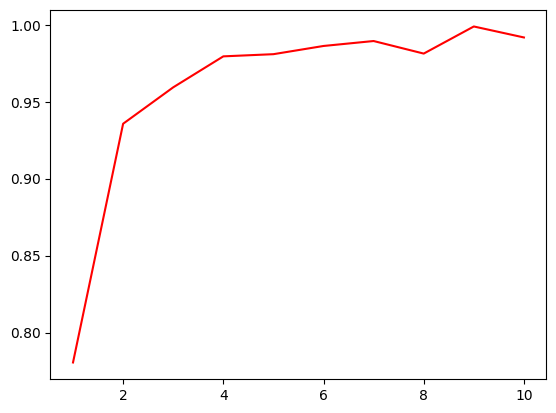

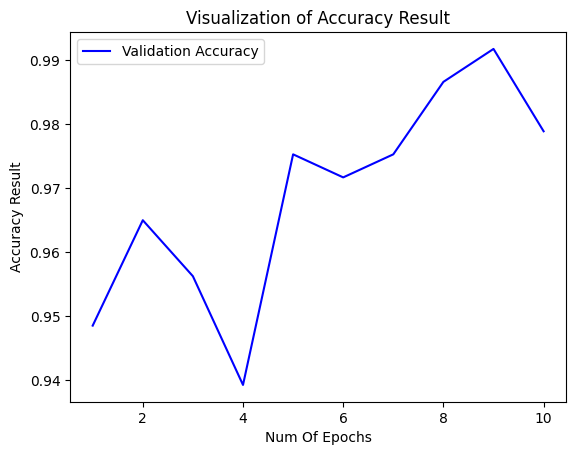

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.show()
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Num Of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Some Other metrics for Model Evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Project/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3886 files belonging to 4 classes.


In [39]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

122/122 [==============================] - 13s 104ms/step


(array([[9.9905533e-01, 4.1264985e-04, 3.3153712e-05, 4.9882452e-04],
        [9.9905533e-01, 4.1264985e-04, 3.3153712e-05, 4.9882452e-04],
        [9.9831700e-01, 2.4264409e-04, 7.2783376e-05, 1.3675592e-03],
        ...,
        [1.8727882e-06, 6.7889306e-07, 8.4947550e-07, 9.9999666e-01],
        [5.1036063e-06, 5.6431159e-02, 1.6366490e-04, 9.4340008e-01],
        [5.1036063e-06, 5.6431159e-02, 1.6366490e-04, 9.4340008e-01]],
       dtype=float32),
 (3886, 4))

In [40]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [41]:
predicted_categories

<tf.Tensor: shape=(3886,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [42]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(3886, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [43]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(3886,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

**Precission Recall**

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.97      0.96      0.97      1008
       Apple___Black_rot       0.99      1.00      0.99       994
Apple___Cedar_apple_rust       0.99      0.98      0.99       880
         Apple___healthy       0.97      0.97      0.97      1004

                accuracy                           0.98      3886
               macro avg       0.98      0.98      0.98      3886
            weighted avg       0.98      0.98      0.98      3886



In [46]:
cm = confusion_matrix(y_true,predicted_categories)

In [47]:
cm.shape

(4, 4)

**Confusion Matrix Visualisation**

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

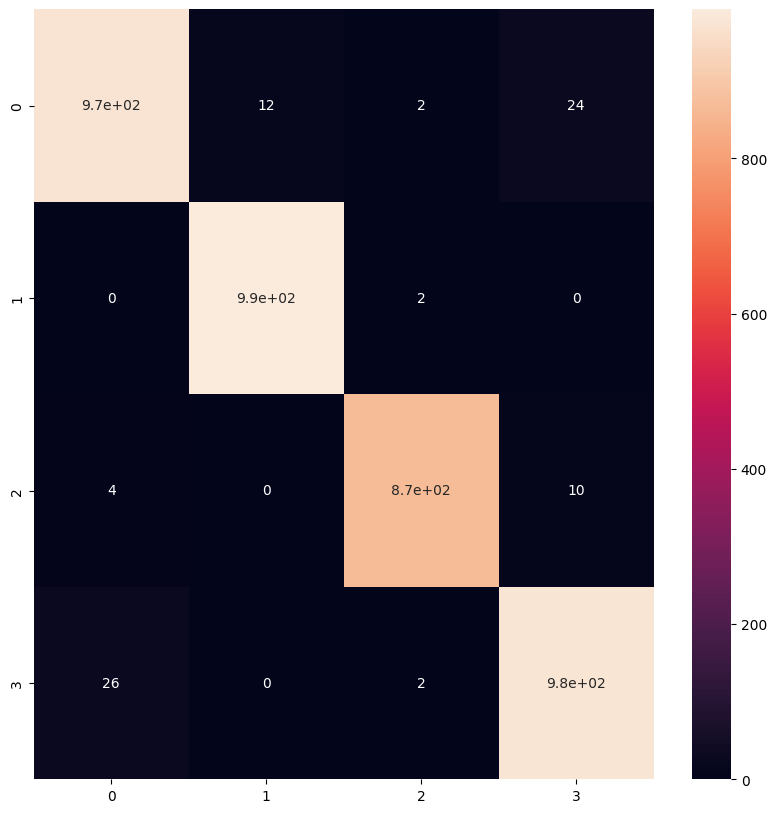

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlable("Predicted Classs",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Apple Leaf Disease Prediction Confusion Matrix")
plt.show()

**SAving Model into the Google Drive**

In [38]:
cnn.save('/content/drive/MyDrive/Project/Trained_plant_disease_model.keras')

In [37]:
# Specify the path in Google Drive where you want to save the model
drive_path = '/content/drive/MyDrive/Project/Trained_Disease_model.h5'
cnn.save(drive_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
